# KTH Individual Trajectory Analysis

## AP Location Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_loc = pd.read_csv("/local/traceset1/APlocations.txt", sep=",")
df = pd.read_csv("/local/traceset1/2014_06.csv", header='infer')
x_coord = df_loc['x_coordinate(m)']
y_coord = df_loc['y_coordinate(m)']

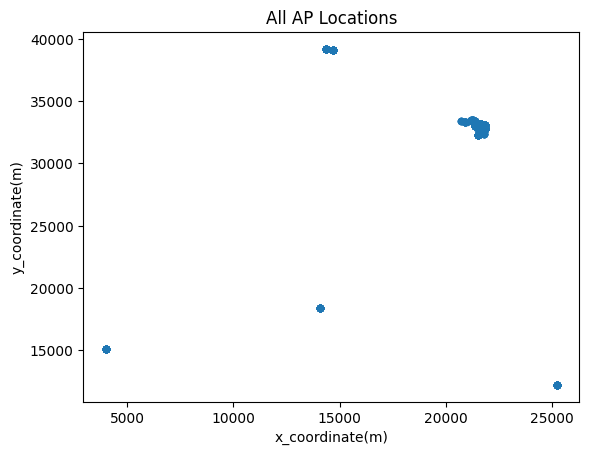

In [ ]:
all_loc = df_loc.plot(kind='scatter', x='x_coordinate(m)', y='y_coordinate(m)', title='All AP Locations')

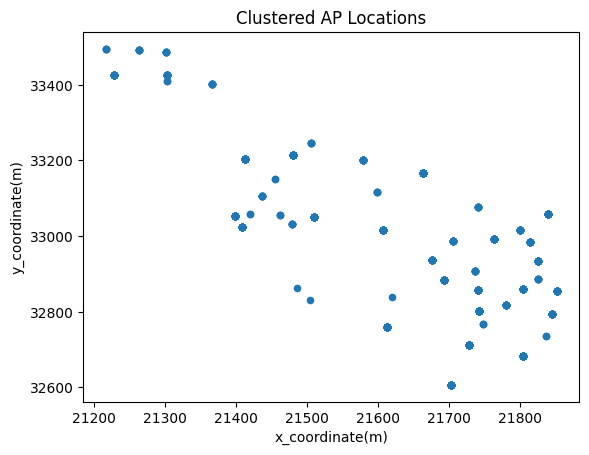

In [ ]:
filter = (df_loc['x_coordinate(m)']>21000) & (df_loc['x_coordinate(m)']<22500) & (df_loc['y_coordinate(m)']>32400) & (df_loc['y_coordinate(m)']< 34000)
filtered_loc = df_loc.loc[filter]
filtered_plt = filtered_loc.plot(kind='scatter', x='x_coordinate(m)', y='y_coordinate(m)', title='Clustered AP Locations')

## Trajectory Plot for One Client

In [ ]:
# find the person with the most traffic
ppl_occr = df.client.value_counts()
prsn_client = ppl_occr.nlargest(n = 1)
print(prsn_client)

e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a    24593
Name: client, dtype: int64


In [ ]:
id = "e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a"
trace = df.query('client == @id')
aps_visited = trace.AP.unique()
print(aps_visited)

['Bldg3AP51' 'Bldg3AP48' 'Bldg3AP50' 'Bldg3AP115' 'Bldg3AP49' 'Bldg3AP54'
 'Bldg3AP53' 'Bldg14AP10' 'Bldg3AP113' 'Bldg6AP38' 'Bldg3AP64' 'Bldg3AP63'
 'Bldg3AP47' 'Bldg3AP61' 'Bldg3AP78' 'Bldg3AP71' 'Bldg3AP120' 'Bldg3AP81'
 'Bldg3AP11' 'Bldg3AP94' 'Bldg3AP32' 'Bldg3AP96' 'Bldg3AP102' 'Bldg3AP114'
 'Bldg3AP110' 'Bldg3AP44' 'Bldg3AP35' 'Bldg3AP91' 'Bldg3AP95' 'Bldg3AP99'
 'Bldg3AP55']


In [ ]:
df_merged = pd.merge(trace, df_loc, on='AP', how="left")

In [ ]:
df_merged.head()

,timestamp,client,AP,x_coordinate(m),y_coordinate(m),floor
0,2014-06-11 11:55:51,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
1,2014-06-11 11:56:35,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
2,2014-06-11 11:57:21,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
3,2014-06-11 11:57:33,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
4,2014-06-11 11:57:46,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0


<AxesSubplot:title={'center':"One Client's Trace"}, xlabel='x_coordinate(m)', ylabel='y_coordinate(m)'>

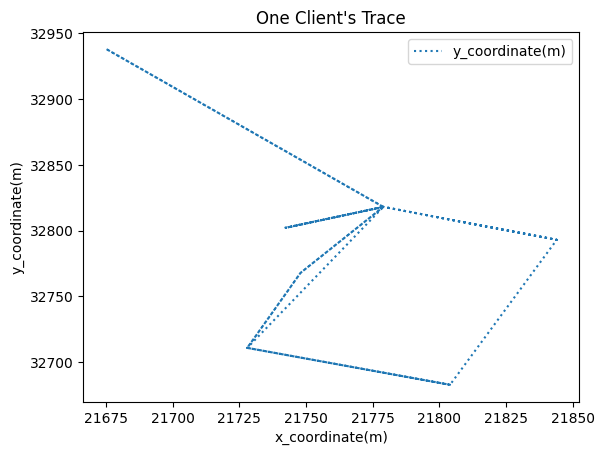

In [ ]:
df_merged.plot(x='x_coordinate(m)', y='y_coordinate(m)', title='One Client\'s Trace', linestyle='dotted', ylabel='y_coordinate(m)')

## Timestamp vs. AP Plots for One Client

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
aps = pd.read_csv("/local/traceset1/APlocations.txt", sep=",")
df = pd.read_csv("/local/traceset1/2014_06.csv", header='infer')

In [3]:
print(df)

                   timestamp                                    client  \
0        2014-06-01 00:00:00  d1fbe2c4a9956bb221621fc35f438b8ec59864ab   
1        2014-06-01 00:00:02  cc8f315d1985d98bedccfd665202b2b29abf949b   
2        2014-06-01 00:00:03  6c06e1dccd734c581bc3274ccdc6525529b61896   
3        2014-06-01 00:00:04  6c06e1dccd734c581bc3274ccdc6525529b61896   
4        2014-06-01 00:00:05  c5a9e70c2e12b0e0268cdba77aef17873575bb3b   
...                      ...                                       ...   
3286412  2014-06-30 23:59:26  f64443953de139ed7f06f8499de48d892d9d1a9c   
3286413  2014-06-30 23:59:30  d13d35cd2c07f3f23bc38b9ee0a29df025d005dc   
3286414  2014-06-30 23:59:32  59af2e7462db3960594f71bea063681a271b20e4   
3286415  2014-06-30 23:59:35  d13d35cd2c07f3f23bc38b9ee0a29df025d005dc   
3286416  2014-06-30 23:59:37  59af2e7462db3960594f71bea063681a271b20e4   

                 AP  
0        Bldg37AP12  
1         Bldg4AP19  
2         Bldg3AP16  
3         Bldg3AP96  
4

### Specify an ID

In [4]:
id = "e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a"
trace = df.query('client == @id')
aps_visited = trace.AP.unique()
print(aps_visited)
type(df['timestamp'])

['Bldg3AP51' 'Bldg3AP48' 'Bldg3AP50' 'Bldg3AP115' 'Bldg3AP49' 'Bldg3AP54'
 'Bldg3AP53' 'Bldg14AP10' 'Bldg3AP113' 'Bldg6AP38' 'Bldg3AP64' 'Bldg3AP63'
 'Bldg3AP47' 'Bldg3AP61' 'Bldg3AP78' 'Bldg3AP71' 'Bldg3AP120' 'Bldg3AP81'
 'Bldg3AP11' 'Bldg3AP94' 'Bldg3AP32' 'Bldg3AP96' 'Bldg3AP102' 'Bldg3AP114'
 'Bldg3AP110' 'Bldg3AP44' 'Bldg3AP35' 'Bldg3AP91' 'Bldg3AP95' 'Bldg3AP99'
 'Bldg3AP55']


pandas.core.series.Series

### Merge APs and Association Dataset

In [5]:
df_m = pd.merge(trace, aps, on='AP', how="left")
df_m['timestamp'] = pd.to_datetime(df_m['timestamp'])
# df_m['timestamp'] = df_m['timestamp'].astype('datetime64[ns]')
df_m.head()
type(df_m['timestamp'].iloc[2])

pandas._libs.tslibs.timestamps.Timestamp

### Filter for One day

In [6]:
# Define time intervals
start = '2014-06-11'
end = '2014-06-12'
# Convert string to datetime format
start1 = pd.to_datetime(start)
end1 = pd.to_datetime(end)

# filtered data between start1 and end1
mask = (start1<df_m['timestamp']) & (end1>df_m['timestamp'])
one_day = df_m.loc[mask]

# gbHour = one_day.groupby(pd.Grouper(key='timestamp', freq="1H"))

In [7]:
print(one_day)

               timestamp                                    client         AP  \
0    2014-06-11 11:55:51  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP51   
1    2014-06-11 11:56:35  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP51   
2    2014-06-11 11:57:21  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP51   
3    2014-06-11 11:57:33  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP51   
4    2014-06-11 11:57:46  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP51   
...                  ...                                       ...        ...   
2287 2014-06-11 23:57:10  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP48   
2288 2014-06-11 23:58:18  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP48   
2289 2014-06-11 23:58:38  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP48   
2290 2014-06-11 23:58:54  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP48   
2291 2014-06-11 23:59:12  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a  Bldg3AP48   

      x_coordinate(m)  y_co

### Plot Trajectory (Timestamp vs. APs)

<AxesSubplot:title={'center':'Trajectory Plot of One Client in One Day'}, xlabel='AP', ylabel='timestamp'>

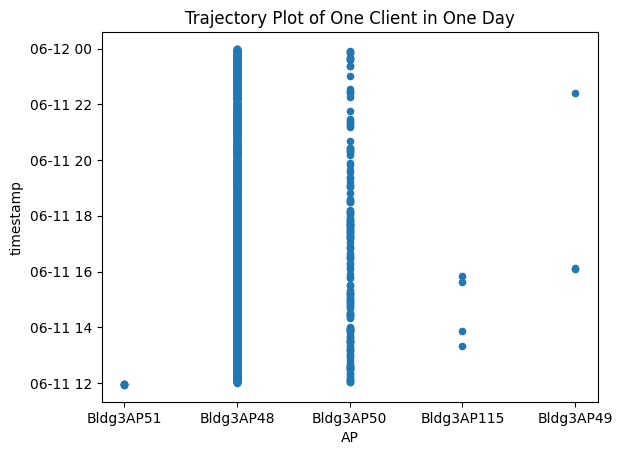

In [21]:
one_day.plot.scatter(x='AP', y = 'timestamp', title = 'Trajectory Plot of One Client in One Day')
# gbHour.plot.scatter(x='AP', y = 'timestamp')
# one_day.plot.hexbin(x='AP', y = 'timestamp')

## 3D plot

<function matplotlib.pyplot.show(close=None, block=None)>

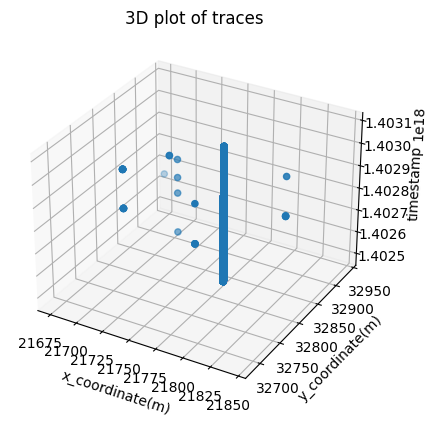

In [22]:
df_m['timestamp'] = pd.to_datetime(df_m['timestamp']).astype('int64')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df_m['x_coordinate(m)'], df_m['y_coordinate(m)'], df_m['timestamp'])
ax.set_xlabel('x_coordinate(m)')
ax.set_ylabel('y_coordinate(m)')
ax.set_zlabel('timestamp')
ax.set_title('3D plot of traces')
plt.show

## Combine into a Function

In [23]:
def plot_traj(client, start, end):
    # query for one person
    trace = df.query('client == @client')
    # converting timestamp
    trace['timestamp'] = pd.to_datetime(trace['timestamp'])
    # Convert string to datetime format
    start1 = pd.to_datetime(start)
    end1 = pd.to_datetime(end)
    # filtered data between start1 and end1
    mask = (start1<trace['timestamp']) & (end1>trace['timestamp'])
    one_day = trace.loc[mask]
    # plot timestamp vs. APs
    one_day.plot.scatter(x='AP', y = 'timestamp', title = 'Trajectory Plot of One Client in One Day') 
    
    # merge
    df_m = pd.merge(trace, aps, on='AP', how="left")
    df_m['timestamp'] = pd.to_datetime(df_m['timestamp']).astype('int64')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(df_m['x_coordinate(m)'], df_m['y_coordinate(m)'], df_m['timestamp'])
    ax.set_xlabel('x_coordinate(m)')
    ax.set_ylabel('y_coordinate(m)')
    ax.set_zlabel('timestamp')
    ax.set_title('3D plot of client')
    plt.show

/tmp/ipykernel_2375191/2681569257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trace['timestamp'] = pd.to_datetime(trace['timestamp'])


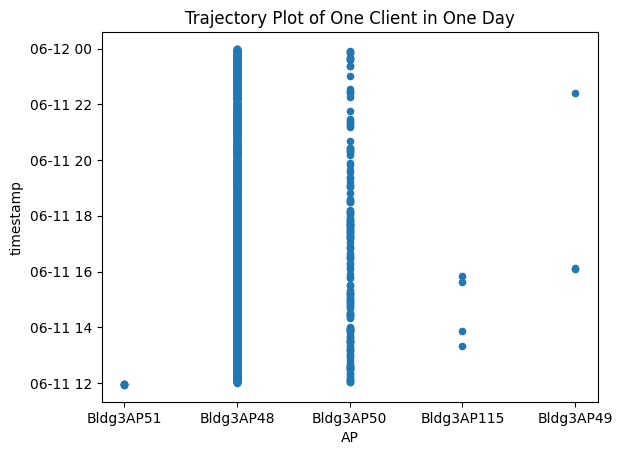

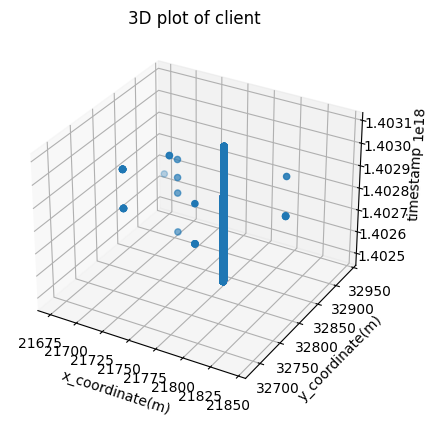

In [24]:
plot_traj("e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a", '2014-06-11', '2014-06-12')